In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Combining data from two periods of 2009-2010 and 2010-2011

In [31]:
d1 = pd.read_csv("d1.csv", encoding='ISO-8859-1')
d2 = pd.read_csv("d2.csv", encoding='ISO-8859-1')
data = pd.concat([d1, d2], axis=0)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [32]:
data.shape

(1067371, 8)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [35]:
data = data[(data["Quantity"]>0) & (data["Price"]>0)]

In [36]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236122
Country             0
dtype: int64

In [37]:
data.dropna(inplace=True)

In [38]:
data.shape

(805549, 8)

In [39]:
data.drop_duplicates(inplace=True)

In [40]:
data.shape

(779425, 8)

In [41]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [42]:
data['Customer ID'].nunique()

5878

In [43]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [44]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [45]:
type(data['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
data.nunique()

Invoice        36969
StockCode       4631
Description     5283
Quantity         437
InvoiceDate    34585
Price            665
Customer ID     5878
Country           41
dtype: int64

In [47]:
data['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [48]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [49]:
data["Total Price"] = data["Quantity"] * data["Price"]

In [50]:
today = data['InvoiceDate'].max() + pd.Timedelta(days=4)
today

Timestamp('2011-12-13 12:50:00')

In [51]:
data['InvoiceMonth'] = data["InvoiceDate"].dt.to_period("M")

In [52]:
data['InvoiceYear'] = data["InvoiceDate"].dt.to_period("Y")

In [53]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth,InvoiceYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12,2009
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011


In [54]:
data["Cohort_Monthly"] = data.groupby("Customer ID")["InvoiceMonth"].transform('min')

In [55]:
data["Cohort_Yearly"] = data.groupby("Customer ID")["InvoiceYear"].transform('min')

In [56]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth,InvoiceYear,Cohort_Monthly,Cohort_Yearly
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009,2009-12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009,2009-12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009,2009-12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009,2009-12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009,2009-12,2009


**Monthly Cohort Analysis**

In [57]:
cohort_m = data.groupby(["Cohort_Monthly", "InvoiceMonth"]).agg(Count = ("Customer ID", "nunique")).reset_index(drop = False)
cohort_m

,Cohort_Monthly,InvoiceMonth,Count
0,2009-12,2009-12,955
1,2009-12,2010-01,337
2,2009-12,2010-02,319
3,2009-12,2010-03,406
4,2009-12,2010-04,363
...,...,...,...
320,2011-10,2011-11,71
321,2011-10,2011-12,35
322,2011-11,2011-11,191
323,2011-11,2011-12,27


In [66]:
cohort_m["M_Period"] = (cohort_m.InvoiceMonth - cohort_m.Cohort_Monthly).apply(lambda x: x.n)

In [69]:
cohort_m.head()

,Cohort_Monthly,InvoiceMonth,Count,M_Period
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4


In [73]:
cohort_m_p = cohort_m.pivot_table(index="Cohort_Monthly", columns="M_Period", values="Count")
cohort_m_p

M_Period,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Cohort_Monthly,,,,,,,,,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
retention_mat = round(cohort_m_p.divide(cohort_m_p.iloc[:, 0], axis = 0),3)
retention_mat

M_Period,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Cohort_Monthly,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.353,0.334,0.425,0.380,0.359,0.377,0.342,0.336,0.362,...,0.303,0.263,0.303,0.283,0.260,0.255,0.315,0.305,0.407,0.197
2010-01,1.0,0.206,0.311,0.305,0.264,0.300,0.258,0.230,0.279,0.319,...,0.151,0.235,0.198,0.185,0.196,0.243,0.193,0.245,0.057,NaN
2010-02,1.0,0.238,0.225,0.291,0.246,0.201,0.193,0.286,0.254,0.275,...,0.201,0.160,0.163,0.144,0.230,0.230,0.163,0.059,NaN,NaN
2010-03,1.0,0.190,0.230,0.242,0.233,0.203,0.246,0.302,0.275,0.108,...,0.169,0.174,0.156,0.176,0.201,0.212,0.079,NaN,NaN,NaN
2010-04,1.0,0.194,0.194,0.163,0.184,0.224,0.276,0.262,0.105,0.109,...,0.156,0.139,0.150,0.180,0.224,0.058,NaN,NaN,NaN,NaN
2010-05,1.0,0.157,0.169,0.173,0.177,0.256,0.213,0.126,0.059,0.083,...,0.126,0.138,0.165,0.154,0.047,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.174,0.189,0.204,0.230,0.285,0.126,0.089,0.081,0.119,...,0.122,0.133,0.204,0.052,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.156,0.183,0.296,0.290,0.140,0.113,0.145,0.145,0.113,...,0.172,0.237,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.204,0.296,0.321,0.173,0.117,0.099,0.123,0.136,0.130,...,0.198,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


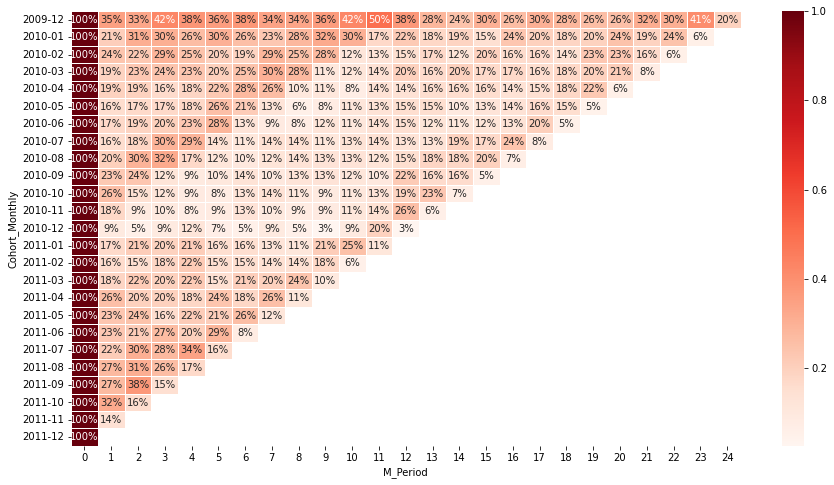

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(retention_mat, 
            mask=retention_mat.isnull(),
            annot=True, 
            cmap="Reds", 
            linewidths=.5, 
            fmt='.0%', 
            xticklabels=1, 
            yticklabels=1)
plt.show()

**Yearly Cohort Analysis**

In [80]:
cohort_y = data.groupby(["Cohort_Yearly", "InvoiceYear"]).agg(Count = ("Customer ID", "nunique")).reset_index(drop = False)
cohort_y

,Cohort_Yearly,InvoiceYear,Count
0,2009,2009,955
1,2009,2010,844
2,2009,2011,709
3,2010,2010,3387
4,2010,2011,1974
5,2011,2011,1536


In [81]:
cohort_y["Y_Period"] = (cohort_y.InvoiceYear - cohort_y.Cohort_Yearly).apply(lambda x: x.n)

In [82]:
cohort_y.head()

,Cohort_Yearly,InvoiceYear,Count,Y_Period
0,2009,2009,955,0
1,2009,2010,844,1
2,2009,2011,709,2
3,2010,2010,3387,0
4,2010,2011,1974,1


In [83]:
cohort_y_p = cohort_y.pivot_table(index="Cohort_Yearly", columns="Y_Period", values="Count")
cohort_y_p

Y_Period,0,1,2
Cohort_Yearly,,,
2009,955.0,844.0,709.0
2010,3387.0,1974.0,NaN
2011,1536.0,NaN,NaN


In [85]:
retention_mat = round(cohort_y_p.divide(cohort_y_p.iloc[:, 0], axis = 0),3)
retention_mat

Y_Period,0,1,2
Cohort_Yearly,,,
2009,1.0,0.884,0.742
2010,1.0,0.583,NaN
2011,1.0,NaN,NaN


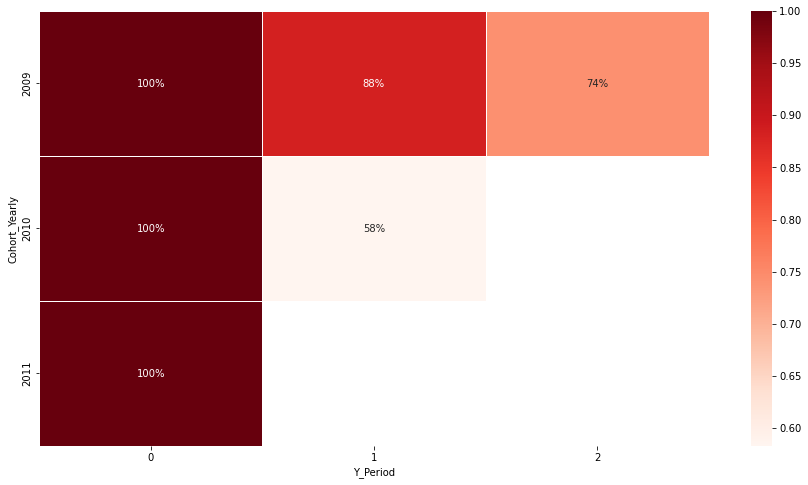

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(retention_mat, 
            mask=retention_mat.isnull(),
            annot=True, 
            cmap="Reds", 
            linewidths=.5, 
            fmt='.0%', 
            xticklabels=1, 
            yticklabels=1)
plt.show()